# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

LABEL = INCOME

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
data.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [7]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


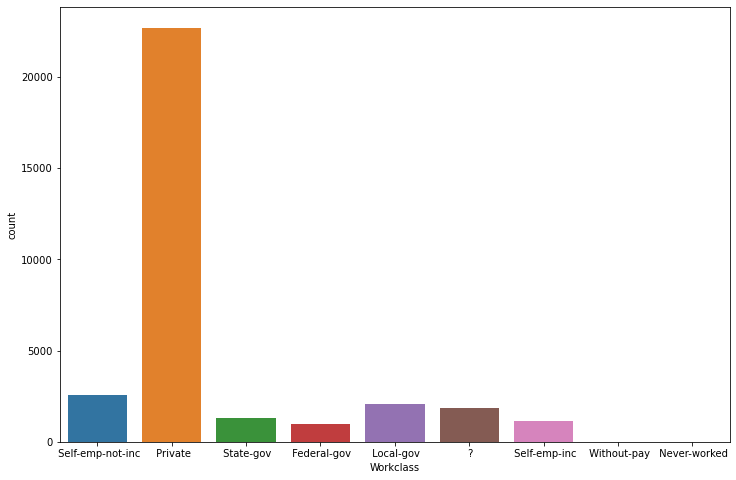

In [12]:
plt.figure(figsize=(12,8))
ax= sns.countplot(x='Workclass',data = data)
print(data['Workclass'].value_counts())

there are most no of people which are working in private sectors

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


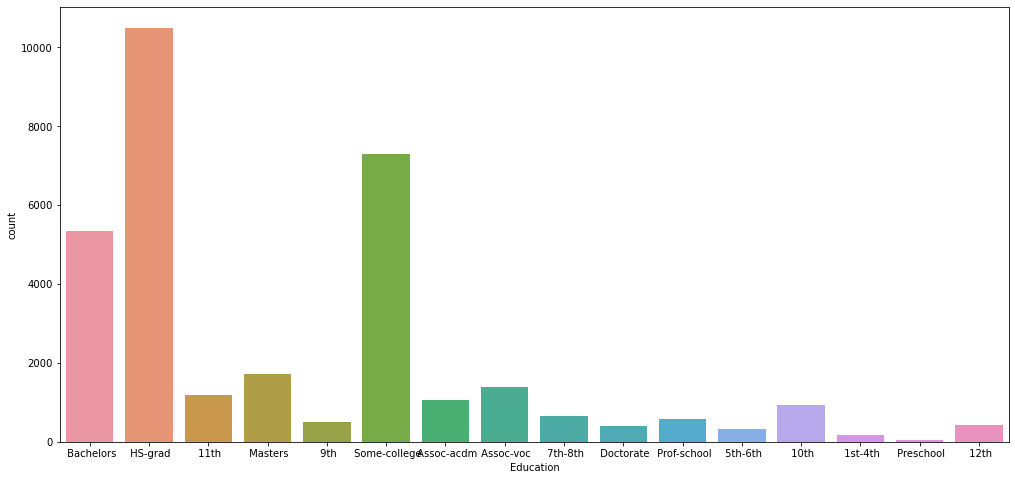

In [14]:
plt.figure(figsize=(17,8))
ax= sns.countplot(x='Education',data = data)
print(data['Education'].value_counts())

as the graph most no of people are educated and doing education from HS-grad or from some college

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


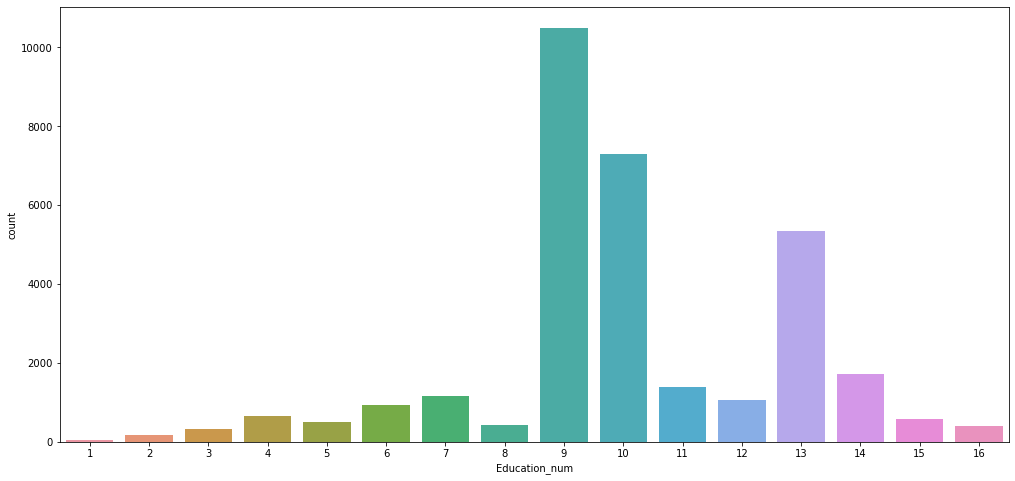

In [15]:
plt.figure(figsize=(17,8))
ax= sns.countplot(x='Education_num',data = data)
print(data['Education_num'].value_counts())

so basically it is the no. that is given to the education
9 = HS-grad
10 = some-college
13 = bachelors

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


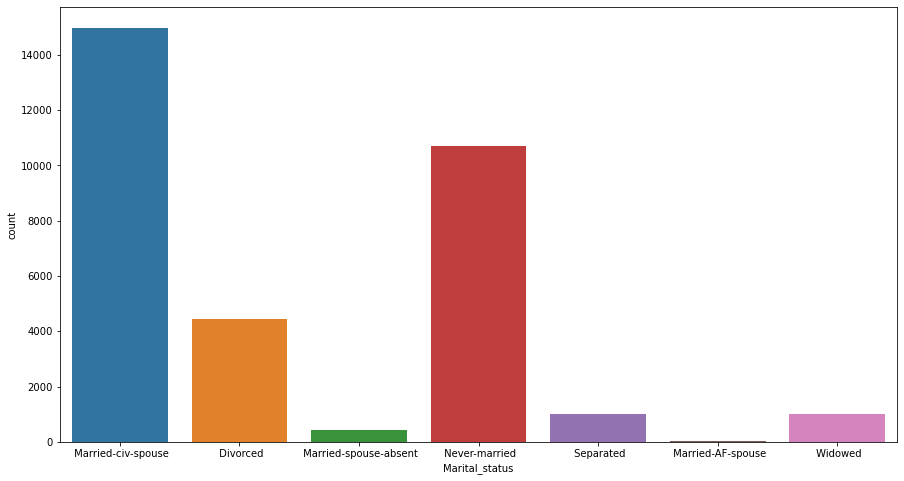

In [17]:
plt.figure(figsize=(15,8))
ax= sns.countplot(x='Marital_status',data = data)
print(data['Marital_status'].value_counts())

there are no of people present which Never-married and the most no of people are having marital status i.e.Married-civ_sposue

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


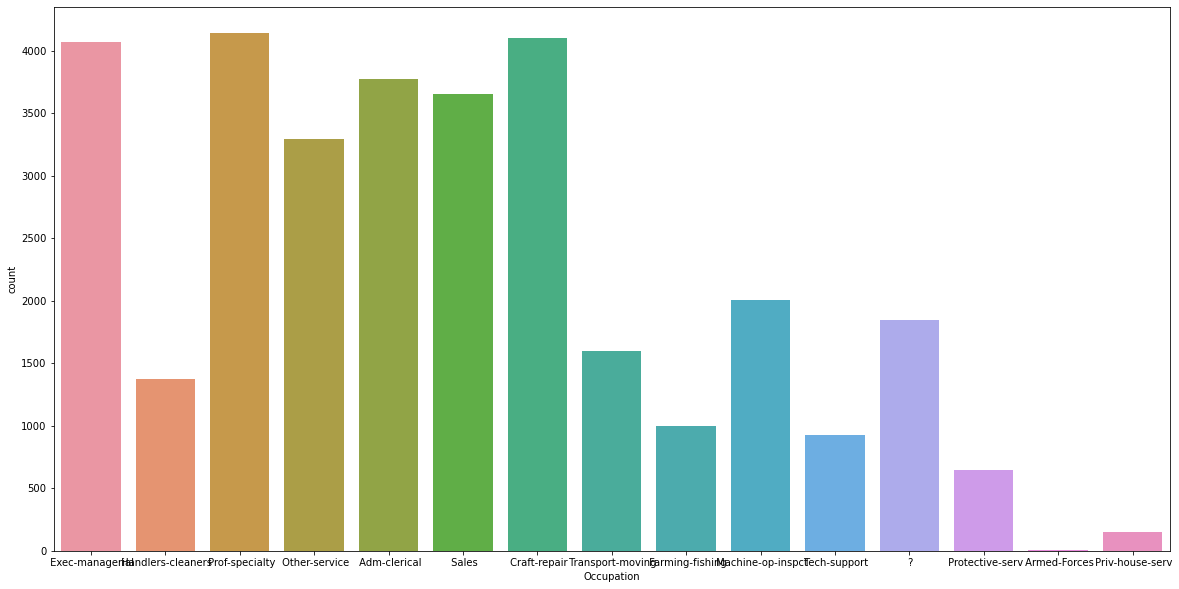

In [19]:
plt.figure(figsize=(20,10))
ax= sns.countplot(x='Occupation',data = data)
print(data['Occupation'].value_counts())

As the graph shows clearly , there are very fewest people which are in the armed forces and max no of people are chossing the occupation
is- Prof-speciality,Craft repairand managerial post

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


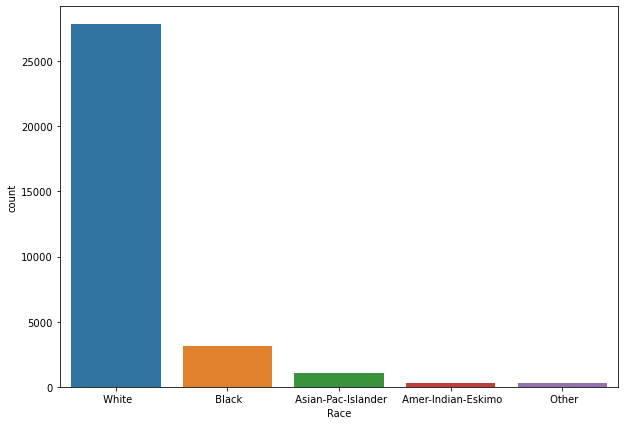

In [22]:
plt.figure(figsize=(10,7))
ax= sns.countplot(x='Race',data = data)
print(data['Race'].value_counts())

Max no of people are White in race 

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


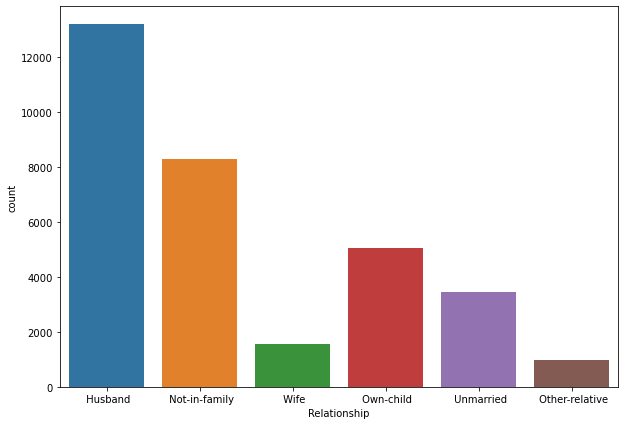

In [24]:
plt.figure(figsize=(10,7))
ax= sns.countplot(x='Relationship',data = data)
print(data['Relationship'].value_counts())

Relationship ratio between husband and wife is very different

 Male      21789
 Female    10771
Name: Sex, dtype: int64


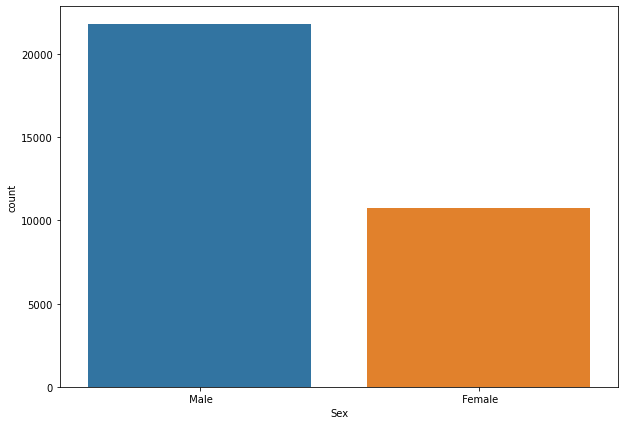

In [25]:
plt.figure(figsize=(10,7))
ax= sns.countplot(x='Sex',data = data)
print(data['Sex'].value_counts())

there are almost double no of people who are male 

In [27]:
print(data['Native_country'].value_counts())

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

There are max no of people whose native couontry is United-States

<AxesSubplot:xlabel='Age'>

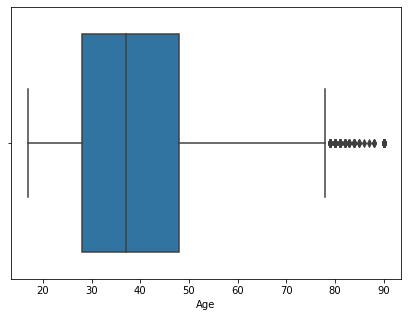

In [29]:
plt.figure(figsize=(7,5))
sns.boxplot('Age',data=data)

The max no of people's age are in between 28 to 50 and some are greater than 80yrs
it means people are in good medium age 

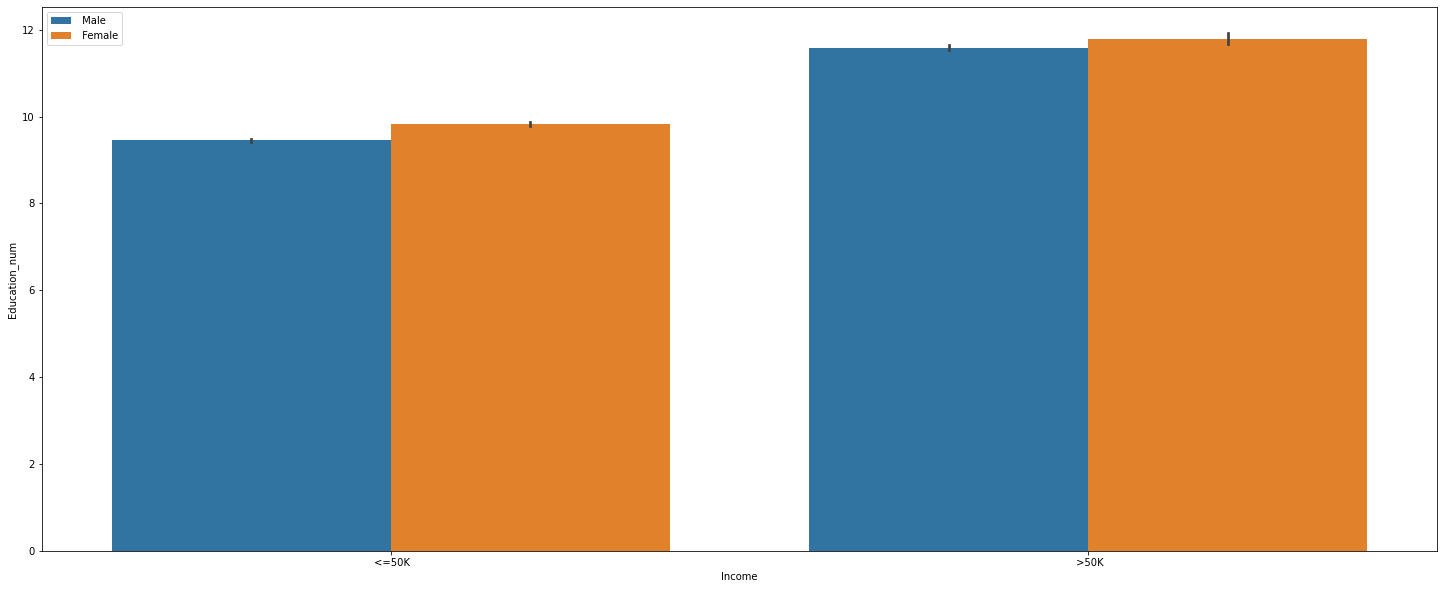

In [42]:
plt.figure(figsize=(25,10))
sns.barplot('Income','Education_num',hue='Sex',data=data)
plt.legend()

Females are slightly superior in the terms of income whether it is more than or less than $50k than Males

<AxesSubplot:xlabel='Sex', ylabel='Education_num'>

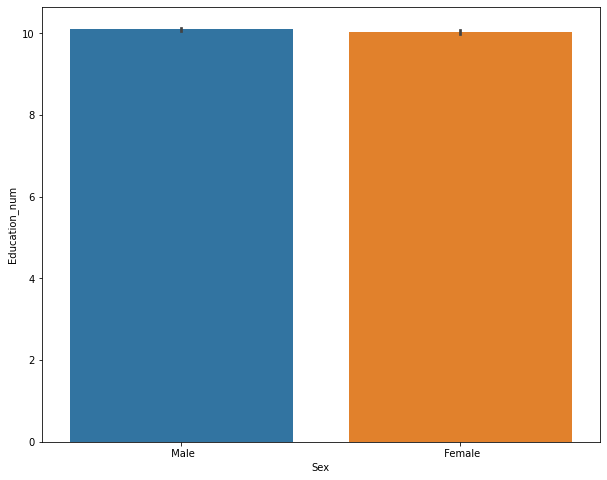

In [46]:
plt.figure(figsize=(10,8))
sns.barplot('Sex','Education_num',data=data)

Male and Female are almost equal in the terms of education gained

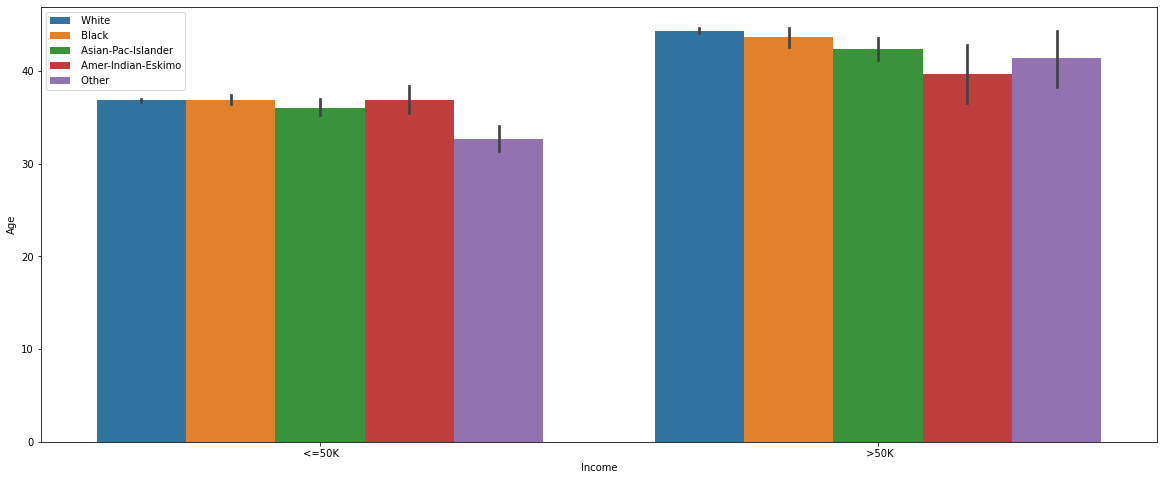

In [53]:
plt.figure(figsize=(20,8))
sns.barplot('Income','Age',hue='Race',data=data)
plt.legend()

Peoples having age less than 36 having income less than $50k

In [3]:
data = data.drop(['Education'],axis=1)
data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


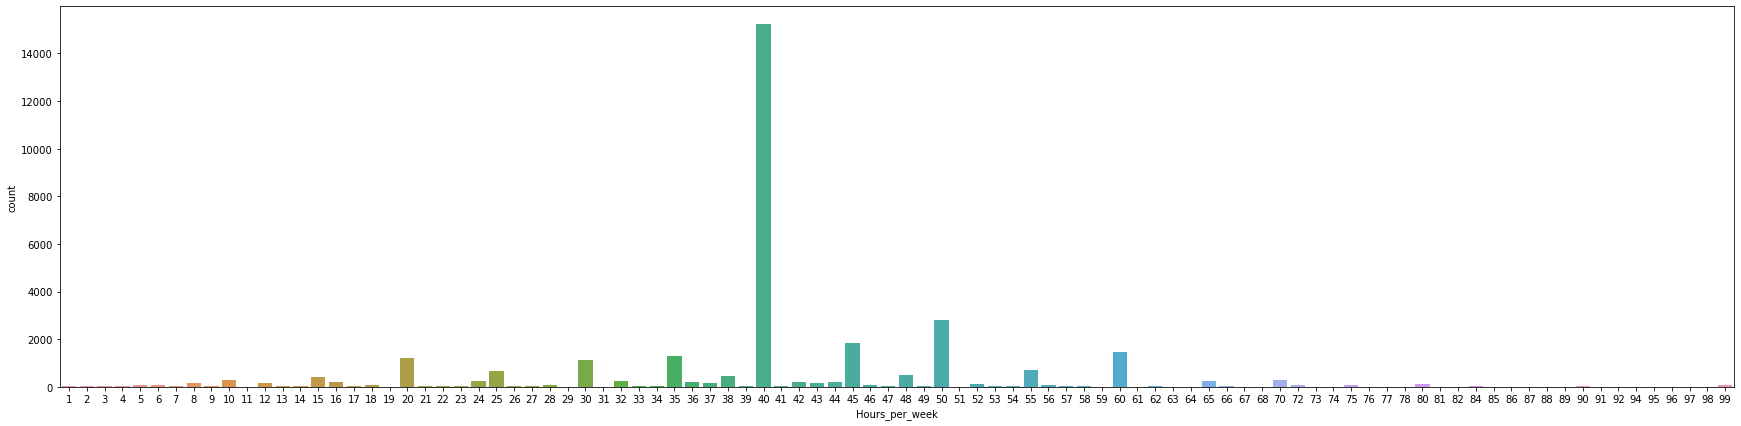

In [64]:
plt.figure(figsize=(30,7))
ax= sns.countplot(x='Hours_per_week',data = data)
print(data['Hours_per_week'].value_counts())

40 hours per week is the max working hours for people

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()
var_mode = ['Workclass','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

for i in var_mode:
    data[i] = le.fit_transform(data[i])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education_num   32560 non-null  int64
 4   Marital_status  32560 non-null  int32
 5   Occupation      32560 non-null  int32
 6   Relationship    32560 non-null  int32
 7   Race            32560 non-null  int32
 8   Sex             32560 non-null  int32
 9   Capital_gain    32560 non-null  int64
 10  Capital_loss    32560 non-null  int64
 11  Hours_per_week  32560 non-null  int64
 12  Native_country  32560 non-null  int32
 13  Income          32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [7]:
data.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,14,2,4,5,4,0,0,0,40,39,0


In [75]:
data.describe()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


In [77]:
data['Capital_gain'].value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64

In [78]:
data['Capital_loss'].value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64

In [79]:
data.corr()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003786,-0.076646,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
Workclass,0.003786,1.000000,-0.016587,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
Fnlwgt,-0.076646,-0.016587,1.000000,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
Education_num,0.036527,0.052015,-0.043159,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.064798,0.028184,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.255004,0.001554,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.090449,0.008922,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
Race,0.028718,0.049720,-0.021278,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Sex,0.088832,0.095942,0.026882,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
Capital_gain,0.077674,0.033828,0.000437,0.122627,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333


<AxesSubplot:>

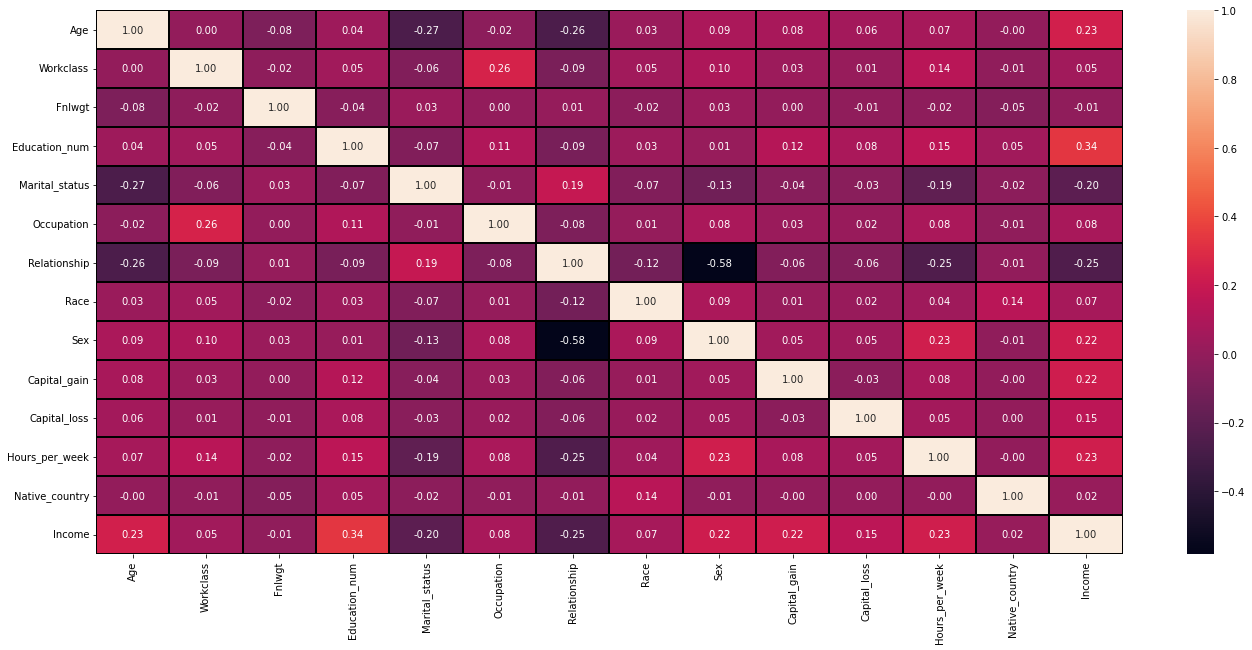

In [84]:
plt.figure(figsize=(23,10))
sns.heatmap(data.corr(),annot= True,linewidth=0.1,linecolor='black',fmt="0.2f")

Native country is the least correlated with the features as well as the target

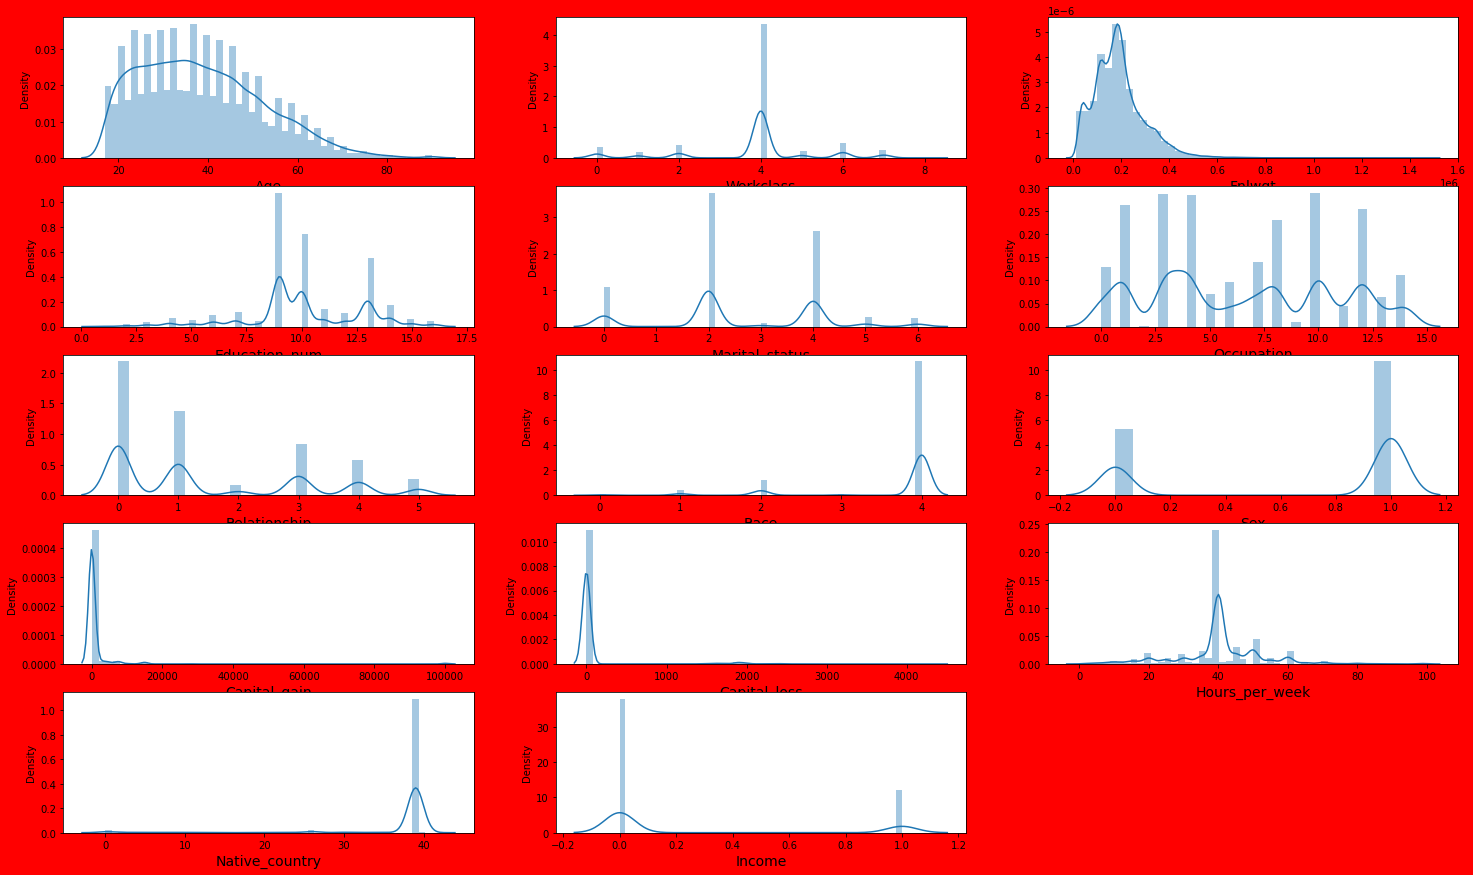

In [86]:
plt.figure(figsize = (25,15),facecolor = "red")
plotnumber = 1
for column in data:
    if plotnumber<=14:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
        
    plotnumber+=1
plt.show()

In [8]:
# seprating the columns into features and target

x= data.drop("Income",axis=1)
y= data["Income"]

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled= sc.fit_transform(x)

In [94]:
x_scaled.shape[1]

13

In [95]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["features"] = x.columns

vif

,vif,features
0,1.159504,Age
1,1.093424,Workclass
2,1.012178,Fnlwgt
3,1.065368,Education_num
4,1.126918,Marital_status
5,1.086975,Occupation
6,1.682661,Relationship
7,1.038268,Race
8,1.558504,Sex
9,1.028084,Capital_gain


so clearly there is no multicollinearity as we saw in the heatmap but this is also one more proof as the vif value is very less

MODEL BUILDING

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.25)

In [11]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_lr)*100)
print('-------------------')
print('===================')
print('-------------------')
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy 78.36609336609337
-------------------
-------------------
[[5819  354]
 [1407  560]]
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      6173
           1       0.61      0.28      0.39      1967

    accuracy                           0.78      8140
   macro avg       0.71      0.61      0.63      8140
weighted avg       0.76      0.78      0.75      8140



In [12]:
Test_accuracy = accuracy_score(y_test,pred_lr)

In [13]:
from sklearn.model_selection import cross_val_score

In [14]:
scr_lr = cross_val_score(lr,x,y,cv=5)
print("Cross Validation Score of logistic regression model is :-",scr_lr.mean())

Cross Validation Score of logistic regression model is :- 0.7922604422604422


In [104]:
# now we trying with Decision tree classifier 

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_dt)*100)
print('-------------------------')
print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test,pred_dt))

Accuracy 81.04422604422604
-------------------------
[[5402  771]
 [ 772 1195]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6173
           1       0.61      0.61      0.61      1967

    accuracy                           0.81      8140
   macro avg       0.74      0.74      0.74      8140
weighted avg       0.81      0.81      0.81      8140



In [17]:
scr_dt = cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score of Decision TREE model is :-",scr_dt.mean())

Cross Validation Score of Decision TREE model is :- 0.8073710073710074


In [108]:
# now check with random forest classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_rf)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_rf))
print(classification_report(y_test,pred_rf))

Accuracy 85.73710073710073
[[5770  403]
 [ 758 1209]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6173
           1       0.75      0.61      0.68      1967

    accuracy                           0.86      8140
   macro avg       0.82      0.77      0.79      8140
weighted avg       0.85      0.86      0.85      8140



In [20]:
scr_rf = cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score of RANDOM FOREST model is :-",scr_rf.mean())

Cross Validation Score of RANDOM FOREST model is :- 0.8589373464373464


In [112]:
# now with SVC algo

In [21]:
from sklearn.svm import SVC

sv = SVC()
sv.fit(x_train,y_train)

pred_sv=sv.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_sv)*100)

print('=========================================')
print(confusion_matrix(y_test,pred_sv))
print(classification_report(y_test,pred_sv))

Accuracy 79.01719901719902
[[6166    7]
 [1701  266]]
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      6173
           1       0.97      0.14      0.24      1967

    accuracy                           0.79      8140
   macro avg       0.88      0.57      0.56      8140
weighted avg       0.83      0.79      0.72      8140



In [22]:
scr = cross_val_score(sv,x,y,cv=5)
print("Cross Validation Score of SVC model is :-",scr.mean())

Cross Validation Score of SVC model is :- 0.7952395577395578


In [23]:
# now with Knn

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn=kn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_kn)*100)
print('=======================================')
print(confusion_matrix(y_test,pred_kn))
print(classification_report(y_test,pred_kn))

Accuracy 77.02702702702703
[[5673  500]
 [1370  597]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      6173
           1       0.54      0.30      0.39      1967

    accuracy                           0.77      8140
   macro avg       0.67      0.61      0.62      8140
weighted avg       0.74      0.77      0.75      8140



In [26]:
knn = cross_val_score(kn,x,y,cv=5)
print("Cross Validation Score of Knn model is :-",knn.mean())

Cross Validation Score of Knn model is :- 0.7762285012285013


In [27]:
# so the difference between the cross val score and the accuracy score is  minimun for the Random forest SO WE USED THIS algo


# BUT BEFORE USED HYPERPARAMETER TUNING WITH GRIDSEARCHCV

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameters = {'max_depth':range(2,4),'min_samples_leaf':range(2,4),'min_samples_split':range(2,4),'n_estimators':[20,30,60,80]}

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30}


In [45]:
rf = RandomForestClassifier(max_depth= 3, min_samples_leaf=2, min_samples_split= 2, n_estimators= 40)

In [46]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=2, n_estimators=40)

In [47]:
y_pred = rf.predict(x_test)

In [48]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[6078,   95],
       [1280,  687]], dtype=int64)

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      6173
           1       0.88      0.35      0.50      1967

    accuracy                           0.83      8140
   macro avg       0.85      0.67      0.70      8140
weighted avg       0.84      0.83      0.80      8140



In [61]:
print("ACCURACY",accuracy_score(y_test,y_pred))

ACCURACY 0.831081081081081


In [57]:
# ROC CURVE 

fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [58]:
print('THRESHOLDS=',thresholds)
print('True positive rate=',tpr)
print('FAlse positive rate=',fpr)


THRESHOLDS= [2 1 0]
True positive rate= [0.         0.34926284 1.        ]
FAlse positive rate= [0.        0.0153896 1.       ]


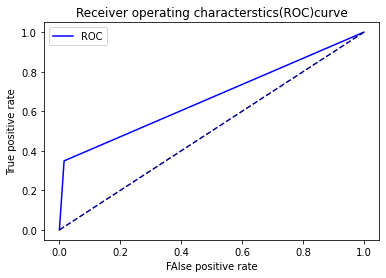

In [59]:
plt.plot(fpr,tpr,color = 'blue',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--')
plt.xlabel('FAlse positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characterstics(ROC)curve')
plt.legend()
plt.show()

In [60]:
# lets chk area it is covering(AUC)
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.6669366184684588


In [54]:
# saving the model for later prediction
import pickle

In [55]:
filename = 'CENSUS INCOME.pickle'
pickle.dump(rf,open(filename,'wb'))

# hence model is completed